# Emissions in Portugal (2018 data)

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import squarify
from textwrap import fill
from IPython.core.pylabtools import figsize

plt.style.use('science')
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [2]:
# Data source files
SECTOR_DATA = 'data/sector-emissions.csv'
UNIT_DATA = 'data/unit-emissions.csv'
FUTURE_DATA = 'data/future-emissions.csv'

## Emissions by sector

In [3]:
# Load data
df_sector = pd.read_csv(SECTOR_DATA, sep=';')
df_sector

,sector,emissoes (Mt CO2eq),percent emissoes
0,Industria Energética,19.1,25.7
1,Energia para uso Residencial,2.1,2.8
2,Energia para uso Comercial/Institucional,1.2,1.7
3,Transportes (nacional),18.1,24.4
4,Transportes (internacional),6.1,8.2
5,Processos Industriais e Energéticos da Industr...,11.3,15.2
6,Fabrico e utilização de outros produtos,3.7,5.0
7,"Agricultura, Florestas, Pecuária e Pesca",8.0,10.8
8,Resíduos,4.6,6.2


In [4]:
# Translate labels
labels = [
    'Energy (industrial)', 'Energy (residential)', 'Energy (commercial)', 'Transportation (national)', 'Transportation (international)', 
    'Manufacturing and Construction industries', 'Manufacturing and usage of other products', 'Agriculture, Forest, Livestock and Fishing', 'Residues'
]
df_sector['labels'] = labels

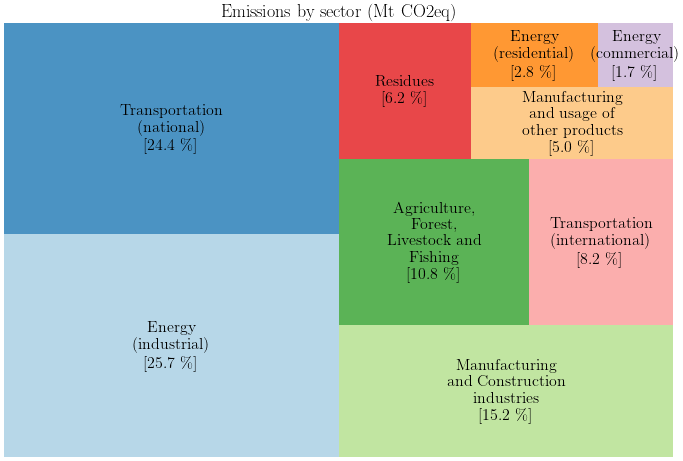

In [5]:
# Update labels with percent value (uses textwrap.fill to wrap long text)
df_sector['labels'] = [fill(x, 16) for x in df_sector['labels']]
df_sector['labels'] = df_sector.apply(lambda x: f"{x['labels']}\n[{x['percent emissoes']} \%]", axis=1)

# Sort data
df_sector.sort_values('emissoes (Mt CO2eq)', ascending=False, inplace=True)

# Set colors
cmap = matplotlib.cm.get_cmap('Paired')
colors = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

# Create treemap
figsize(12,8)
squarify.plot(sizes=df_sector['emissoes (Mt CO2eq)'], label=df_sector['labels'], color=colors, alpha=0.8, text_kwargs={'fontsize':16})
plt.title('Emissions by sector (Mt CO2eq)', fontsize=18)
plt.axis('off');
plt.savefig('figures/emissions-sector.png')

## Emissions by source

In [6]:
# Load data
df_unit = pd.read_csv(UNIT_DATA, sep=';')

### Top sources

In [7]:
# Create top table
df_top = df_unit.copy()[['rank', 'unidade', 'local', 'distrito', 'emissões (t CO2eq)', 'proprietário-operador', 'empresa', 'setor']]

# Update headers
df_top.rename(columns={'rank': 'Rank', 'unidade': 'Unit', 'local': 'Location', 'distrito': 'District', 'emissões (t CO2eq)': 'Emissions (t CO2eq)', 'proprietário-operador': 'Owner or Operator', 'empresa': 'Company', 'setor': 'Sector'}, inplace=True)

# Create table
with open('figures/top30.md', 'w', encoding='utf8') as f:
    df_top[:30].drop(columns=['District', 'Sector', 'Company']).to_markdown(buf=f, index=False)
df_top.head()

,Rank,Unit,Location,District,Emissions (t CO2eq),Owner or Operator,Company,Sector
0,1,Central Termoeléctrica Sines,Sines,Setúbal,8440230.0,"EDP - Gestão da Produção de Energia, S.A.",EDP,Energia - Centrais térmicas e outras instalaçõ...
1,2,Central Termoeléctrica do Pego,"Pego, Abrantes",Santarém,3767939.6,Tejo Energia: joint venture entre TrustEnergy ...,Tejo Energia,Energia - Centrais térmicas e outras instalaçõ...
2,3,Refinaria de Sines,Sines,Setúbal,2359050.0,Petróleos de Portugal - Petrogal S.A. → Empres...,Galp Energia,Energia - Refinarias de petróleo e gás mineral
3,4,Central de Ciclo Combinado da Tapada do Outeiro,"Medas, Gondomar",Porto,1501817.0,"Turbogás - Produtora Energética, S.A. → TrustE...",TrustEnergy,Energia - Centrais térmicas e outras instalaçõ...
4,5,Complexo Industrial de Setúbal da Navigator,Mitrena,Setúbal,1382337.2,"Navigator Pulp Setúbal, S.A. → The Navigator C...",The Navigator Company,Papel


### By sector

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


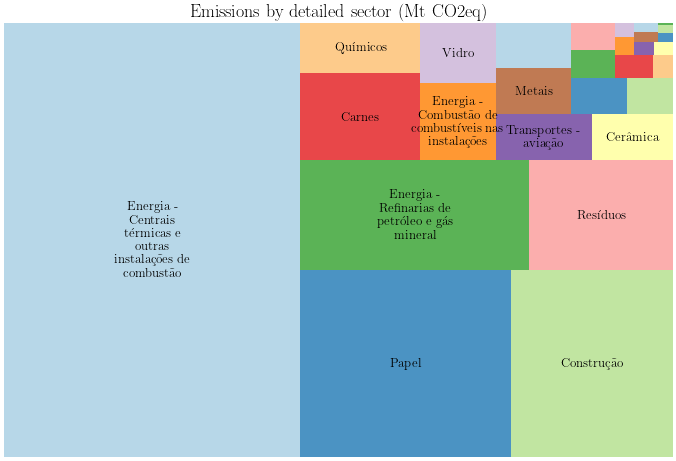

In [8]:
df_top_sector = df_top.groupby(['Sector']).sum().drop(columns=['Rank']).reset_index().sort_values('Emissions (t CO2eq)', ascending=False)

# Update labels with percent value (uses textwrap.fill to wrap long text)
df_top_sector['labels'] = [fill(x, 16) for x in df_top_sector['Sector']]
for i, x in enumerate(df_top_sector['labels']):
    if i < 12:
        df_top_sector['labels'].iloc[i] = x
    else:
        df_top_sector['labels'].iloc[i] = None

# Set colors
cmap = matplotlib.cm.get_cmap('Paired')
colors = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

# Create treemap
figsize(12,8)
squarify.plot(sizes=df_top_sector['Emissions (t CO2eq)'], label=df_top_sector['labels'], color=colors, alpha=0.8, text_kwargs={'fontsize':13})
plt.title('Emissions by detailed sector (Mt CO2eq)', fontsize=18)
plt.axis('off');
plt.savefig('figures/emissions-sector-detail.png')

### Highest by district

In [9]:
# Get highest by district
df_top_distric = df_top.sort_values('Emissions (t CO2eq)', ascending=False).drop_duplicates(['District']).drop(columns=['Rank'])

# Reorder columns
df_top_distric = df_top_distric.set_index('District').reset_index().sort_values('District')

# Create table
with open('figures/top_district.md', 'w', encoding='utf8') as f:
    df_top_distric.drop(columns=['Location', 'Sector', 'Company']).to_markdown(buf=f, index=False)

df_top_distric

,District,Unit,Location,Emissions (t CO2eq),Owner or Operator,Company,Sector
6,Aveiro,Complexo Industrial de Cacia – Navigator,Cacia,884271.2,"Navigator Pulp Cacia, S.A. → The Navigator Com...",The Navigator Company,Papel
17,Beja,Unidade da Resialentejo (Aterro e Triagem),NaN,36750.0,RESIALENTEJO - Tratamento e Valorização de Res...,RESIALENTEJO,Resíduos
4,Braga,"Carnes Landeiro, S.A","Silveiros, Barcelos",963347.4,"Carnes Landeiro, S.A","Carnes Landeiro, S.A",Carnes
15,Bragança,Parque Ambiental do Nordeste Transmontano (PANT),Vila Flor,41000.0,"Residuos do Nordeste, EIM",Residuos do Nordeste,Resíduos
8,Castelo Branco,"CELTEJO, Empresa de Celulose do Tejo,S.A.",Vila Velha de Ródão,465000.0,"CELTEJO - Empresa de Celulose do Tejo, S. A. →...",Altri Group,Papel
3,Coimbra,Central Termoeléctrica de Lares,"Vila Verde, Figueira da Foz",1245769.0,"EDP - Gestão da Produção de Energia, S.A.",EDP,Energia - Centrais térmicas e outras instalaçõ...
10,Faro,CIMPOR - Centro de Produção de Loulé,Loulé,273000.0,CIMPOR Portugal SGPS S.A. → OYAK Cement Group,CIMPOR,Construção
26,"Ilha Graciosa, Açores",Aeródromo da Graciosa,Santa Cruz da Graciosa,2654.9,SATA Air Açores (Público/Estado),SATA Air Açores,Transportes - aviação
13,"Ilha Terceira, Açores",Central Térmica do Belo Jardim,Praia da Vitória,91860.0,"Electricidade dos Açores, S.A.",Electricidade dos Açores,Energia - Combustão de combustíveis nas instal...
11,Ilha da Madeira,Central Térmica da Vitória,Funchal,233105.0,"Empresa de Electricidade da Madeira, S.A",Empresa de Electricidade da Madeira,Energia - Combustão de combustíveis nas instal...


### By Company

In [10]:
df_company = df_top.groupby(['Company']).sum().drop(columns=['Rank']).sort_values('Emissions (t CO2eq)', ascending=False).reset_index()

In [11]:
df_company.head(50)

,Company,Emissions (t CO2eq)
0,EDP,9429255.0
1,The Navigator Company,3935722.0
2,Tejo Energia,3767939.6
3,Galp Energia,2359050.0
4,CIMPOR,2080273.2
5,TrustEnergy,1501817.0
6,SECIL,1474482.0
7,EDP,1245769.0
8,Altri Group,1094246.8
9,Petrogal S.A.,1034009.0


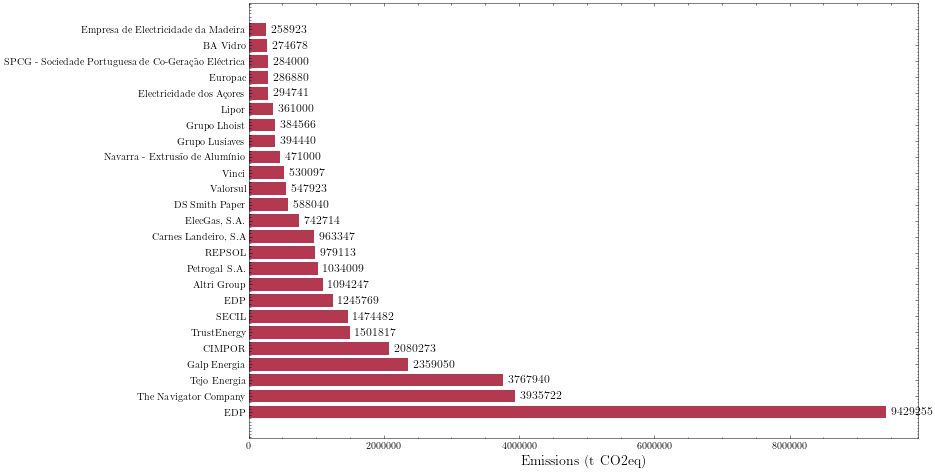

In [20]:
def add_value_labels(ax, spacing=5, precision=2):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
        precision (int): Float precision to use in the annotation.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        ha = 'left'

        # If value of bar is negative: Place label left of bar
        if x_value < 0:
            # Invert space to place label to the left
            space *= -1
            # Horizontally align label at right
            ha = 'right'

        # Use X value as label and format number with one decimal place
        label = "{:.{prec}f}".format(x_value, prec=precision)

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(space, 0),          # Horizontally shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            va='center',                # Vertically center label
            ha=ha,                      # Horizontally align label differently for positive and negative values
            fontsize=12)
          
figsize(12,8)

fig, ax = plt.subplots()
ax.barh(df_company.head(25)['Company'], df_company.head(25)['Emissions (t CO2eq)'], color='#B33951')
plt.xlabel('Emissions (t CO2eq)', fontsize=14)
add_value_labels(ax, precision=0)
plt.savefig('figures/emissions-company.png')